## <u style='color: blue'>Moon Landing Dataset Analysis</u>

##### Importing all the libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

##### Make the DataFrame

In [15]:
moon_dataframe=pd.read_csv("Moonlanding.csv", 
                           encoding='latin-1')
moon_dataframe.head()

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,17-Aug-58,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,23-Sep-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II),Pioneer 1,11-Oct-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,11-Oct-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,8-Nov-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...


In [16]:
moon_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Mission                 158 non-null    object
 1   Spacecraft              158 non-null    object
 2   Launch Date             158 non-null    object
 3   Carrier Rocket          158 non-null    object
 4   Operator                158 non-null    object
 5   Mission Type            158 non-null    object
 6   Outcome                 158 non-null    object
 7   Additional Information  157 non-null    object
dtypes: object(8)
memory usage: 10.0+ KB


#### <span style = 'color:blue'>Exploratory Data Analysis</span>

##### Distribution of "what was the outcome of the mission?"

In [17]:
outcome_distribution = moon_dataframe['Outcome'].value_counts()
fig_outcome = px.bar(outcome_distribution, 
                     x=outcome_distribution.index, 
                     y=outcome_distribution.values, 
                     labels={'x': 'Outcome', 'y': 'Count'}, 
                     title='Distribution of Mission Outcomes',
                     color=outcome_distribution.index)  
fig_outcome.show()

##### Distribution of "what were the types of missions?"

In [18]:
mission_type_distribution = moon_dataframe['Mission Type'].value_counts()
fig_mission_type = px.bar(mission_type_distribution, 
                          y=mission_type_distribution.index, 
                          x=mission_type_distribution.values, 
                          orientation='h', 
                          labels={'y': 'Mission Type', 'x': 'Count'}, 
                          title='Distribution of Mission Types',
                          color=mission_type_distribution.index)  
fig_mission_type.show()

##### Operators involved in Moon Missions

In [25]:
operator_distribution = moon_dataframe['Operator'].value_counts().reset_index()
operator_distribution.columns = ['Operator', 'Count']
fig_operator = px.bar(operator_distribution, 
                      y='Operator', 
                      x='Count', 
                      orientation='h', 
                      title='Operators Involved in Moon Missions',
                      color='Operator')
fig_operator.show()

##### Carrier Rocket Analysis

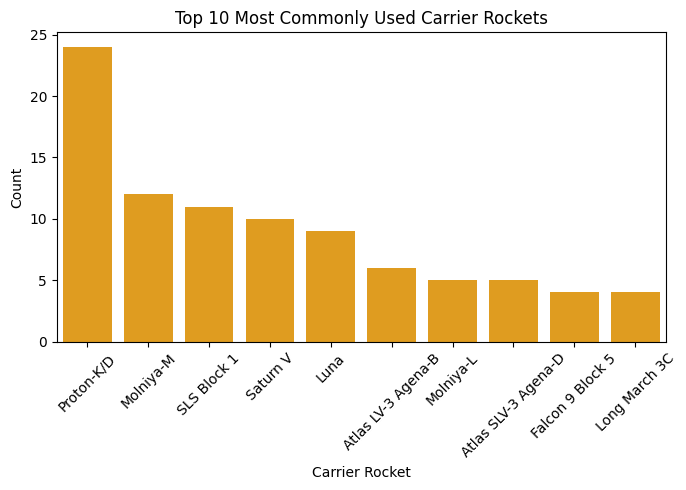

In [41]:
plt.figure(figsize=(7, 5))
top_carrier_rockets = moon_dataframe['Carrier Rocket'].value_counts().head(10)
sns.barplot(x=top_carrier_rockets.index, y=top_carrier_rockets.values, color='orange')
plt.title('Top 10 Most Commonly Used Carrier Rockets')
plt.xlabel('Carrier Rocket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Each operator's number of all 6 types of outcomes

In [53]:
print(moon_dataframe['Outcome'].unique())

['Launch failure' 'Partial failure' 'Successful' 'Spacecraft failure'
 'Operational' 'En route']


In [54]:
pivot_table = moon_dataframe.pivot_table(index='Operator', columns='Outcome', aggfunc='size', fill_value=0).head(10)
pivot_table

Outcome,En route,Launch failure,Operational,Partial failure,Spacecraft failure,Successful
Operator,,,,,,
China CNSA,0,0,5,0,1,9
European Union ESA,1,0,0,0,0,1
India ISRO,0,0,2,0,0,2
Israel SpaceIL,0,0,0,0,1,0
Italy ASI,0,0,1,0,0,0
Japan ISAS,0,0,0,0,1,2
Japan JAXA,0,0,1,0,1,3
Japan Tomy/JAXA/Dodai,0,0,0,0,1,0
Japan United States ISAS/NASA,0,0,0,0,0,1


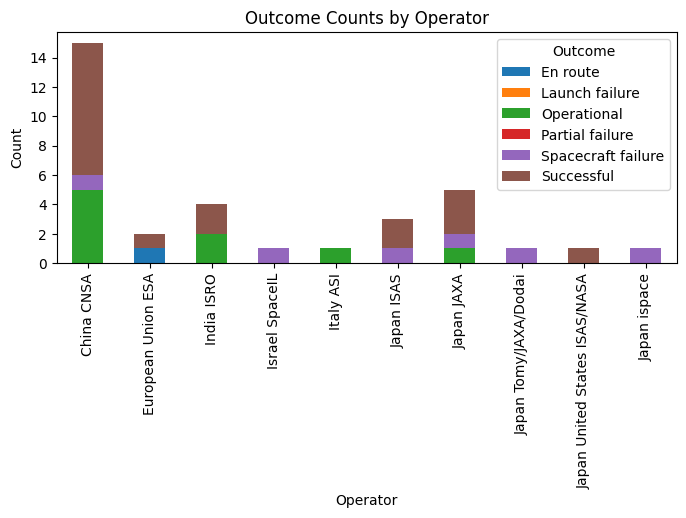

In [59]:
pivot_table.plot(kind='bar', stacked=True, figsize=(8, 3))
plt.title('Outcome Counts by Operator')
plt.xlabel('Operator')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()